In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels as sm
from sklearn.preprocessing import StandardScaler

train_data1 = pd.read_csv('./BATADAL_dataset03.csv', sep = ',')
train_data2 = pd.read_csv('./BATADAL_dataset04.csv', sep = ', ')
test_data = pd.read_csv('./BATADAL_test_dataset.csv', sep = ',')

print("Shape non-attack: ", train_data1.shape)
print("Shape train: ", train_data2.shape)
print("Shape test: ", test_data.shape)

# All numeric values except from the first (datetime)
# print(train_data1.columns.values)

# convert DATETIME to timestamp
train_data = pd.concat([train_data1, train_data2], axis=0, ignore_index=True)
train_data['DATETIME'] = pd.to_datetime(train_data['DATETIME'], infer_datetime_format=True)
train_data['Year'] = train_data['DATETIME'].apply(lambda x: x.year)
train_data['Month'] = train_data['DATETIME'].apply(lambda x: x.month)
train_data['Day'] = train_data['DATETIME'].apply(lambda x: x.day)
train_data['Hour'] = train_data['DATETIME'].apply(lambda x: x.hour)

# Training dataset
X = train_data.drop(['DATETIME', 'ATT_FLAG'], axis=1).values
X_1 = X[:8761]
X_2 = X[8761:]
y = train_data['ATT_FLAG'].values
y_1 = y[:8761]
y_2 = y[8761:]

# NaNs
print("Number of NaN values in training dataset: ", np.sum(pd.isna(train_data).values))
print("Number of NaN values in test dataset: ", np.sum(pd.isna(train_data).values))


print("Training dataset shape: ", X.shape)
print("Number of attacks: ", np.sum(y==1))

/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Shape non-attack:  (8761, 45)
Shape train:  (4177, 45)
Shape test:  (2089, 44)
Number of NaN values in training dataset:  0
Number of NaN values in test dataset:  0
Training dataset shape:  (12938, 47)
Number of attacks:  219


## Correlation matrix

/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  del sys.path[0]
/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  app.launch_new_instance()


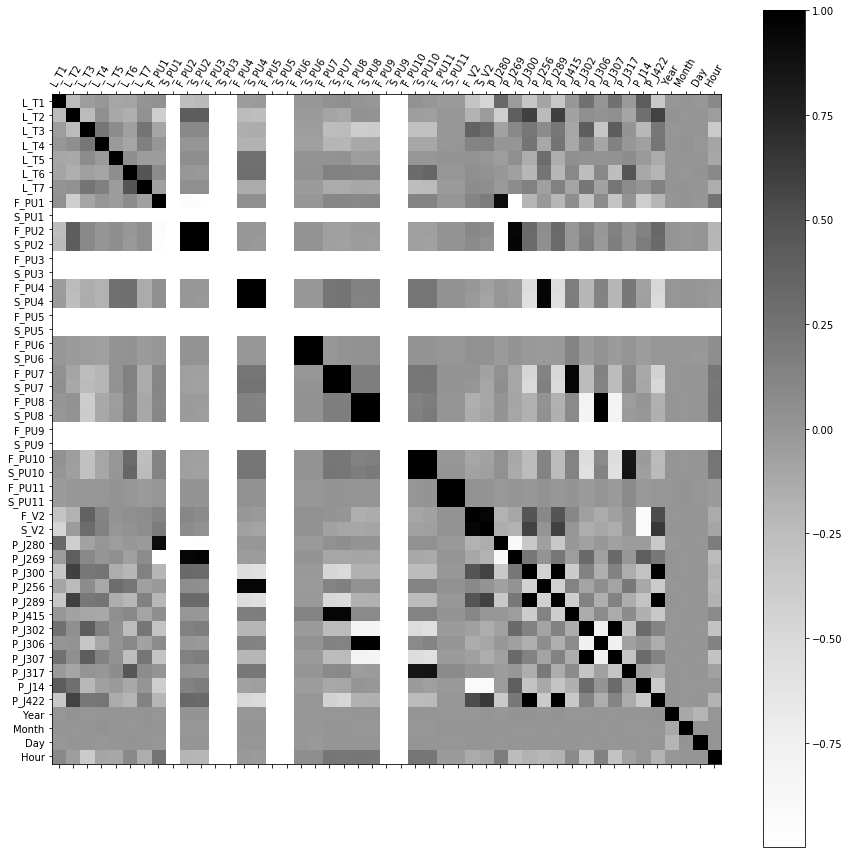

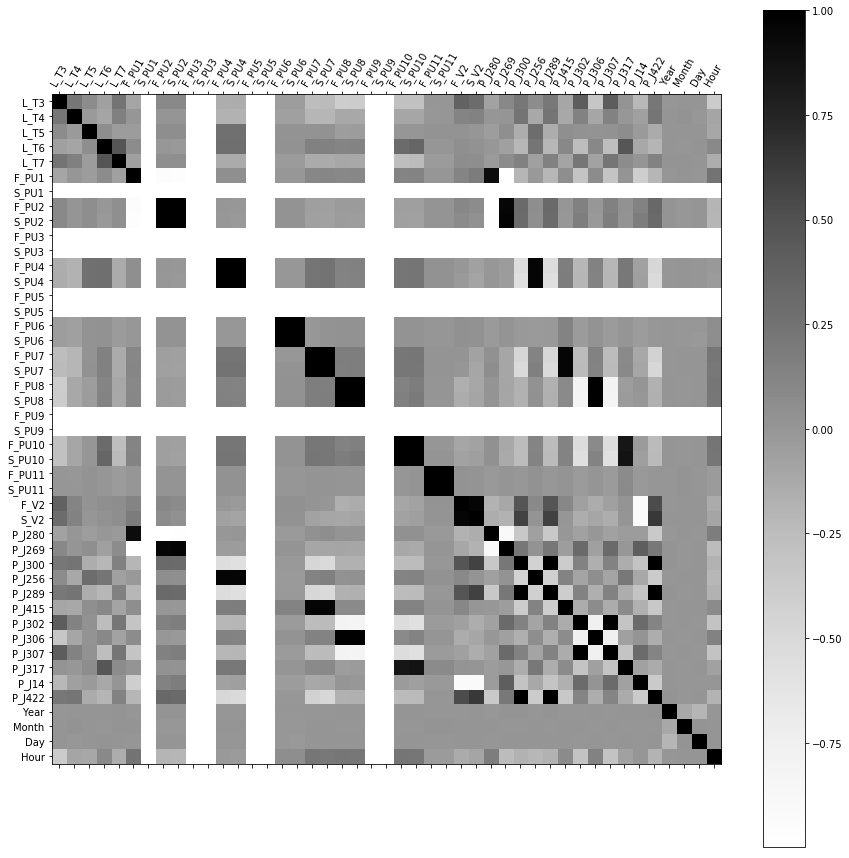

In [120]:
labels = list(train_data.columns)
del labels[0]
del labels[-5]

plt.figure(figsize = (15,15))
plt.matshow(np.corrcoef(X_1, rowvar=False), fignum=1, cmap='Greys')
plt.xticks(range(len(labels)), labels, rotation=60)
plt.yticks(range(len(labels)), labels)
plt.colorbar()

no_var_index = (np.std(X, axis = 0) == 0)

labels_var = np.delete(labels, no_var_index, axis=0)

plt.figure(figsize = (15,15))
plt.matshow(np.corrcoef(np.delete(X_1, no_var_index, axis=1), rowvar=False), fignum=2, cmap='Greys')
plt.xticks(range(len(labels_var)), labels_var, rotation=60)
plt.yticks(range(len(labels_var)), labels_var)
plt.colorbar()

### ARMA

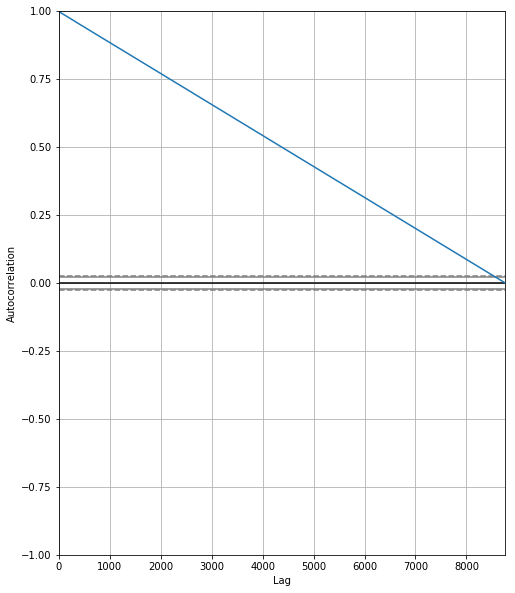

In [5]:
plt.figure(figsize = (8,10))
pd.plotting.autocorrelation_plot(X_1)
